In [1]:
import pandas as pd 
import numpy as np
import warnings
import re 
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

In [2]:
df = pd.read_csv('/kaggle/input/car-accident-dataset/Road Accident Data.csv' , parse_dates = ['Accident Date'])
df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2022-02-18,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,NaN,...,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car
307969,201091NM01881,2022-02-21,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,NaN,...,1,1,Northern,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds,Car
307970,201091NM01935,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,NaN,...,1,3,Northern,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds,Car
307971,201091NM01964,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,NaN,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Day_of_Week                 307973 non-null  object        
 3   Junction_Control            307973 non-null  object        
 4   Junction_Detail             307973 non-null  object        
 5   Accident_Severity           307973 non-null  object        
 6   Latitude                    307973 non-null  float64       
 7   Light_Conditions            307973 non-null  object        
 8   Local_Authority_(District)  307973 non-null  object        
 9   Carriageway_Hazards         5424 non-null    object        
 10  Longitude                   307973 non-null  float64       
 11  Number_of_Casualties        307973 non-

In [4]:
df.drop_duplicates()
df.drop('Carriageway_Hazards' , axis = 1 , inplace = True )
df.drop('Longitude' , axis = 1 , inplace = True )
df.drop('Latitude' , axis = 1 , inplace = True )

In [5]:
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0])
df['Weather_Conditions'] = df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0])
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0])
df['Road_Type'] = df['Road_Type'].fillna(df['Road_Type'].mode()[0])
df = df.dropna(subset=['Time'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307956 entries, 0 to 307972
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307956 non-null  object        
 1   Accident Date               307956 non-null  datetime64[ns]
 2   Day_of_Week                 307956 non-null  object        
 3   Junction_Control            307956 non-null  object        
 4   Junction_Detail             307956 non-null  object        
 5   Accident_Severity           307956 non-null  object        
 6   Light_Conditions            307956 non-null  object        
 7   Local_Authority_(District)  307956 non-null  object        
 8   Number_of_Casualties        307956 non-null  int64         
 9   Number_of_Vehicles          307956 non-null  int64         
 10  Police_Force                307956 non-null  object        
 11  Road_Surface_Conditions     307956 non-null 

In [7]:
df.describe()

,Accident Date,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307956,307956.000000,307956.000000,307956.000000
mean,2021-12-23 22:37:44.396212480,1.356889,1.829066,38.865715
min,2021-01-01 00:00:00,1.000000,1.000000,10.000000
25%,2021-06-28 00:00:00,1.000000,1.000000,30.000000
50%,2021-12-08 00:00:00,1.000000,2.000000,30.000000
75%,2022-06-25 00:00:00,1.000000,2.000000,50.000000
max,2022-12-31 00:00:00,48.000000,32.000000,70.000000
std,NaN,0.815869,0.710466,14.032765


In [8]:
df['Junction_Control'].unique()
df[df['Junction_Control'] == 'Auto traffic signal']

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Light_Conditions,Local_Authority_(District),Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,Daylight,Kensington and Chelsea,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,Darkness - lights lit,Kensington and Chelsea,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
7,200901BS70008,2021-01-02,Friday,Auto traffic signal,Crossroads,Slight,Daylight,Kensington and Chelsea,1,1,Metropolitan Police,Dry,Dual carriageway,30,13:18,Urban,Fine no high winds,Car
9,200901BS70010,2021-01-10,Saturday,Auto traffic signal,Crossroads,Slight,Daylight,Kensington and Chelsea,1,1,Metropolitan Police,Wet or damp,Single carriageway,30,9:52,Urban,Other,Car
10,200901BS70011,2021-01-07,Wednesday,Auto traffic signal,Crossroads,Slight,Darkness - lights lit,Kensington and Chelsea,1,2,Metropolitan Police,Dry,Single carriageway,30,0:09,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307726,201091NE09819,2022-07-04,Sunday,Auto traffic signal,T or staggered junction,Slight,Daylight,Highland,1,2,Northern,Dry,Single carriageway,30,19:04,Rural,Fine + high winds,Car
307744,201091NE15550,2022-10-26,Tuesday,Auto traffic signal,Other junction,Slight,Darkness - lights lit,Highland,1,1,Northern,Wet or damp,Single carriageway,30,18:38,Rural,Raining no high winds,Car
307856,201091NJ10853,2022-08-13,Friday,Auto traffic signal,More than 4 arms (not roundabout),Slight,Daylight,Highland,2,2,Northern,Dry,Single carriageway,30,11:30,Rural,Fine no high winds,Agricultural vehicle
307867,201091NJ13093,2022-09-19,Sunday,Auto traffic signal,Crossroads,Slight,Darkness - lights lit,Highland,1,2,Northern,Wet or damp,Single carriageway,30,19:40,Rural,Raining no high winds,Car


In [9]:
df[df['Junction_Control'] == 'Data missing or out of range']

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Light_Conditions,Local_Authority_(District),Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
12,200901BS70015,2021-01-12,Monday,Data missing or out of range,Not at junction or within 20 metres,Slight,Daylight,Kensington and Chelsea,1,2,Metropolitan Police,Wet or damp,Single carriageway,30,14:00,Urban,Raining no high winds,Car
17,200901BS70021,2021-01-26,Monday,Data missing or out of range,Not at junction or within 20 metres,Slight,Darkness - lights lit,Kensington and Chelsea,1,1,Metropolitan Police,Dry,Single carriageway,30,17:05,Urban,Fine no high winds,Car
19,200901BS70024,2021-01-27,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Slight,Darkness - lights lit,Kensington and Chelsea,1,1,Metropolitan Police,Dry,Single carriageway,30,0:28,Urban,Fine no high winds,Car
38,200901BS70047,2021-02-09,Monday,Data missing or out of range,Not at junction or within 20 metres,Slight,Daylight,Kensington and Chelsea,1,2,Metropolitan Police,Wet or damp,Single carriageway,30,9:15,Urban,Raining no high winds,Car
40,200901BS70050,2021-01-23,Friday,Data missing or out of range,Not at junction or within 20 metres,Slight,Daylight,Kensington and Chelsea,2,1,Metropolitan Police,Wet or damp,Single carriageway,30,11:15,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307962,201091NM00839,2022-01-23,Saturday,Data missing or out of range,Not at junction or within 20 metres,Slight,Daylight,Highland,2,3,Northern,Frost or ice,Single carriageway,60,9:23,Rural,Other,Car
307963,201091NM00903,2022-01-24,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,Darkness - no lighting,Highland,1,1,Northern,Wet or damp,Single carriageway,40,19:30,Rural,Other,Car
307964,201091NM00939,2022-01-25,Monday,Data missing or out of range,Not at junction or within 20 metres,Slight,Darkness - lights lit,Highland,1,2,Northern,Dry,Single carriageway,30,20:05,Rural,Fine no high winds,Car
307968,201091NM01760,2022-02-18,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,Daylight,Highland,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car


In [10]:
df['Junction_Control'].replace('Auto traffic sigl', 'Auto traffic signal', inplace=True)

In [11]:
df['Junction_Control'].unique()

array(['Give way or uncontrolled', 'Auto traffic signal',
       'Data missing or out of range', 'Authorised person', 'Stop sign',
       'Not at junction or within 20 metres'], dtype=object)

In [12]:
df['Accident_Severity'].unique()

array(['Serious', 'Slight', 'Fetal', 'Fatal'], dtype=object)

In [13]:
df['Accident_Severity'].replace(['Serious', 'Slight', 'Fetal', 'Fatal'],['Serious' ,'Slight','Serious','Serious'], inplace = True)

<Axes: xlabel='Accident Date', ylabel='Count'>

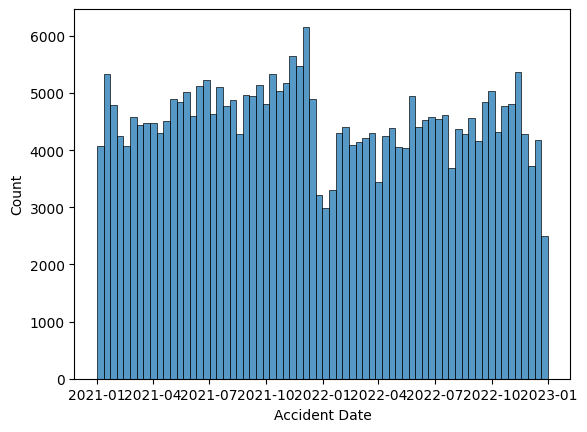

In [14]:
sns.histplot( df , x = 'Accident Date')

at 24 dec to 26 lowest accident cases because its chrismatas day 

<Axes: xlabel='Day_of_Week', ylabel='count'>

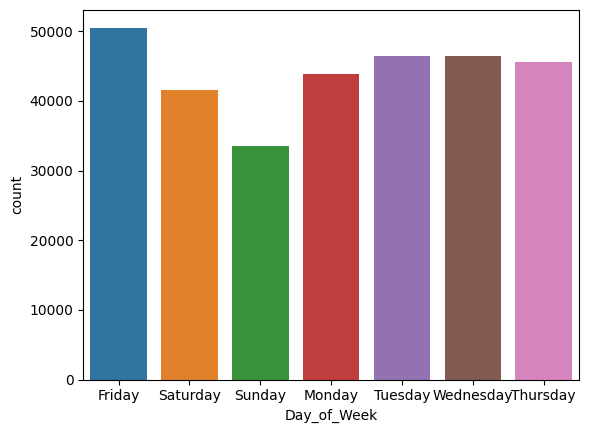

In [15]:
days = ['Friday', 'Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday']
sns.countplot( data = df , x = 'Day_of_Week' , order= days)

<Axes: xlabel='Accident_Severity', ylabel='count'>

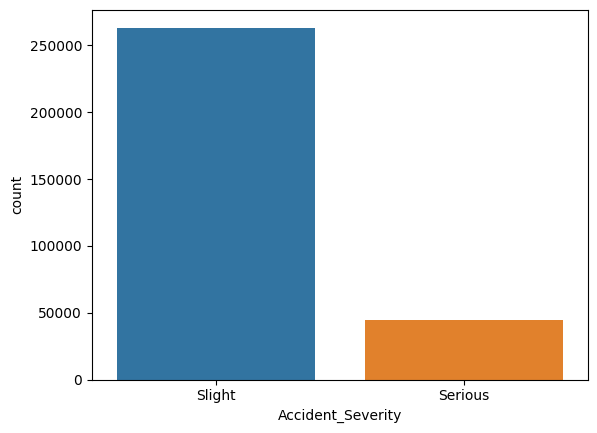

In [16]:
sev = ['Slight' ,'Serious']
sns.countplot(data =df ,x = 'Accident_Severity',order = sev)

<Axes: xlabel='Road_Type', ylabel='count'>

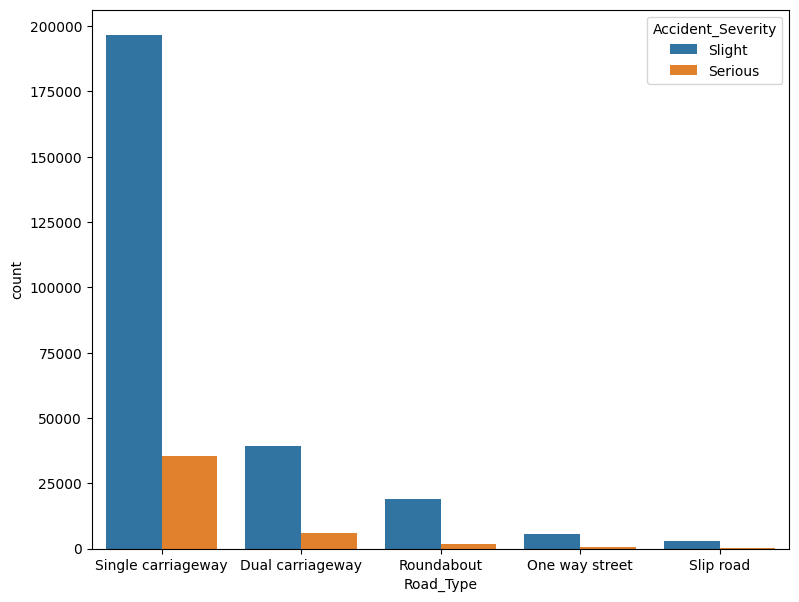

In [17]:
road_type = ['Single carriageway' , 'Dual carriageway' , 'Roundabout' , 'One way street' , 'Slip road']
fig = plt.subplots(figsize = (9,7))
sns.countplot( data = df , x = 'Road_Type' , order = road_type , hue = 'Accident_Severity' ,hue_order =sev)

[Text(0, 0, 'give way or uncontrolled'),
 Text(1, 0, 'auto traffic signal'),
 Text(2, 0, 'Not at junction'),
 Text(3, 0, 'Authorised person'),
 Text(4, 0, 'stop sign'),
 Text(5, 0, 'within 20 meters')]

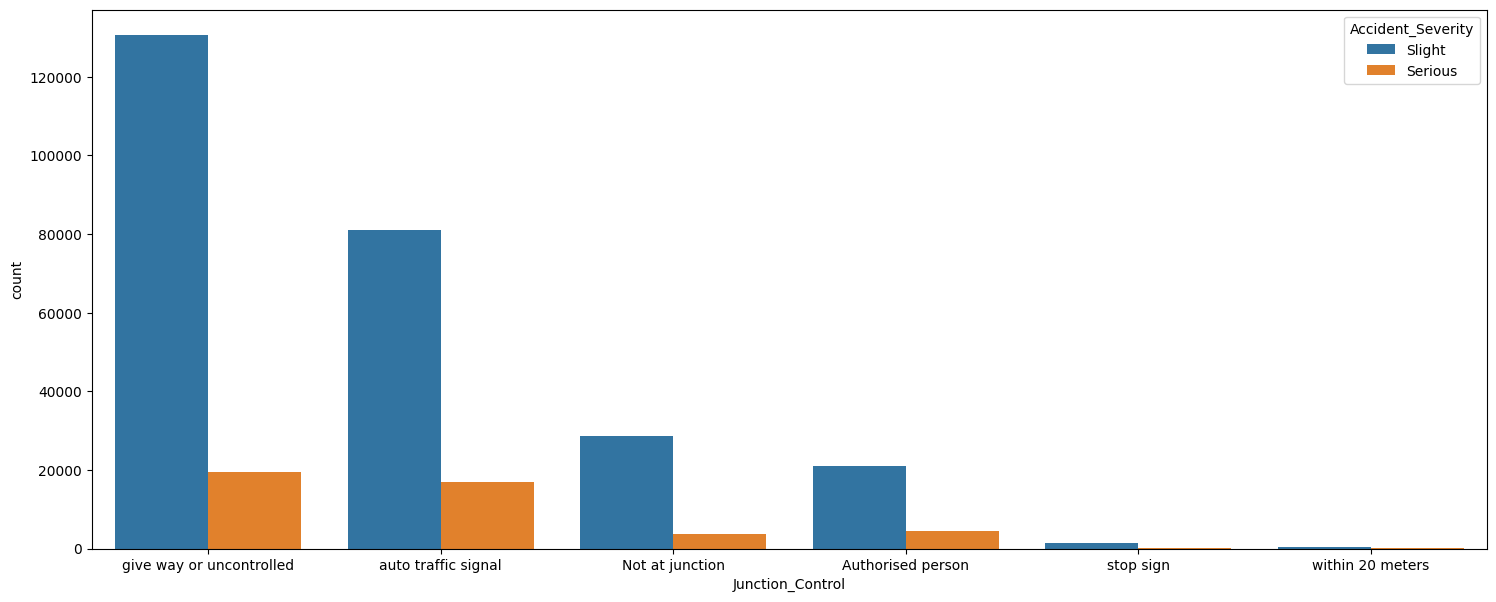

In [18]:
junc_con = ['Give way or uncontrolled' , 'Data missing or out of range' ,'Auto traffic signal' ,'Not at junction or within 20 metres' , 'Stop sign' , 'Authorised person']
fig = plt.subplots(figsize = (18,7))
fig = sns.countplot(data = df , x ='Junction_Control' , order = junc_con ,hue = 'Accident_Severity' ,hue_order =sev)
fig.set_xticklabels(['give way or uncontrolled' , 'auto traffic signal' , 'Not at junction' , 'Authorised person' , 'stop sign' , 'within 20 meters'])

<Axes: xlabel='Road_Surface_Conditions', ylabel='count'>

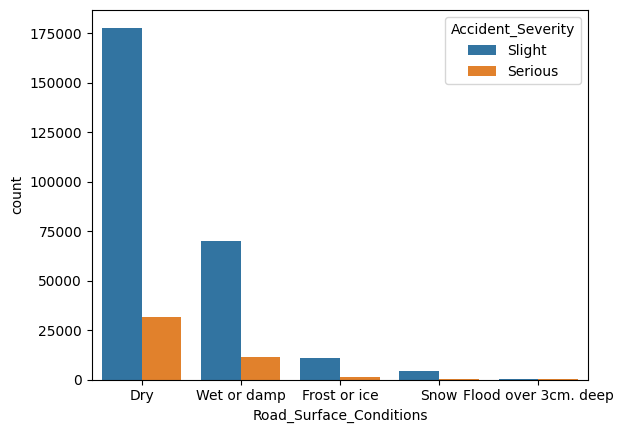

In [19]:
sns.countplot(data = df , x = 'Road_Surface_Conditions' ,hue = 'Accident_Severity' ,hue_order =sev )

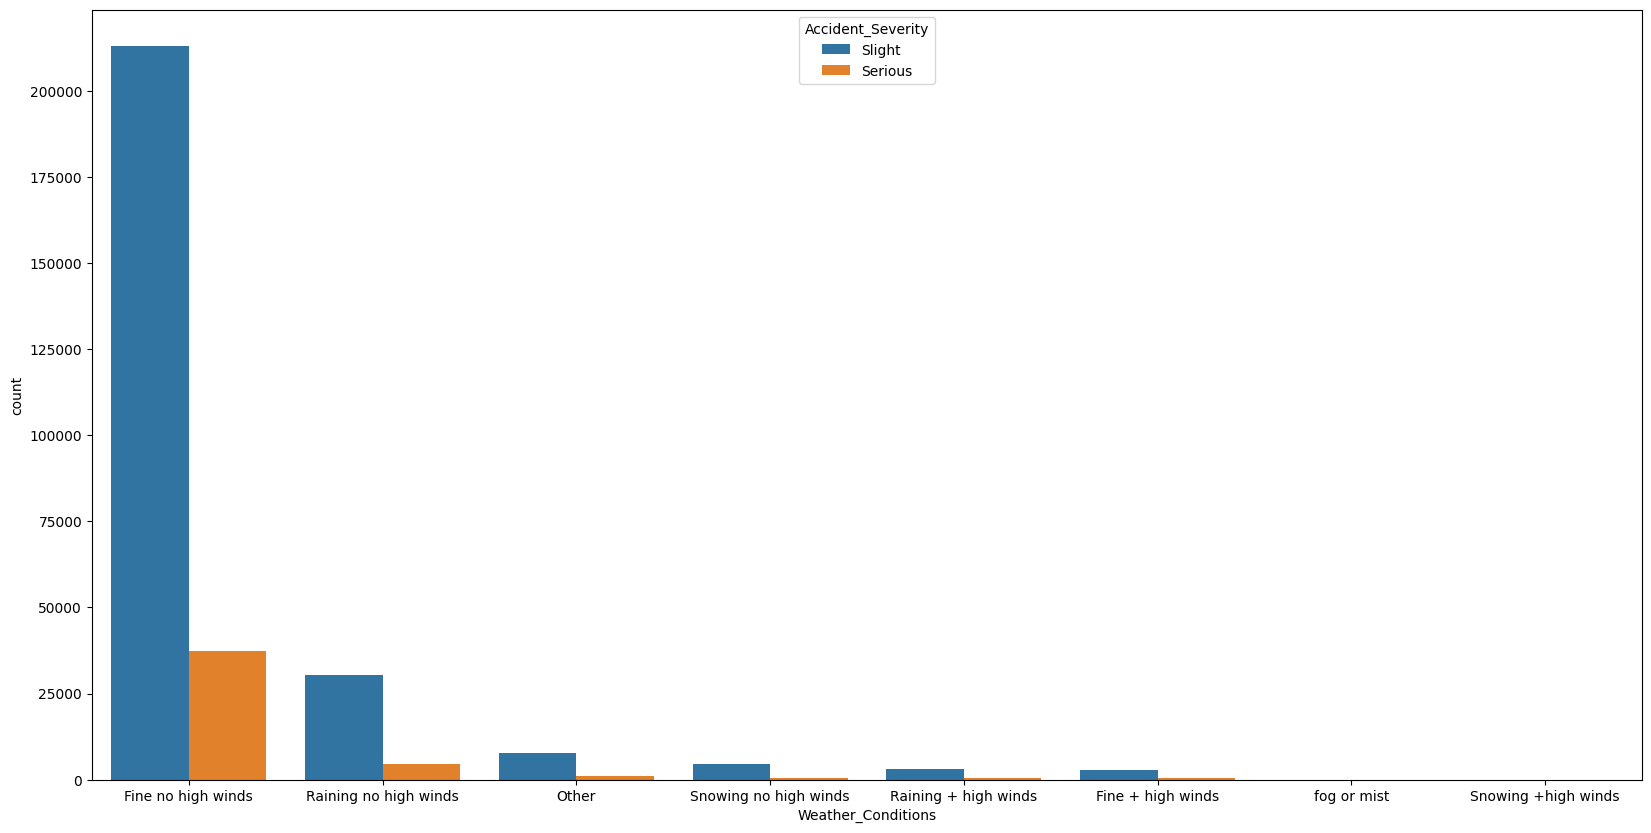

In [20]:
weth = ['Fine no high winds' ,'Raining no high winds',"Other" ,'Snowing no high winds' , 'Raining + high winds' , 'Fine + high winds' , 'fog or mist' , 'Snowing +high winds']
fig = plt.subplots(figsize = (20 ,10))
fig = sns.countplot(data = df , x = 'Weather_Conditions' , order = weth , hue = 'Accident_Severity' ,hue_order =sev)

In [21]:
df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Light_Conditions,Local_Authority_(District),Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,Daylight,Kensington and Chelsea,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,Daylight,Kensington and Chelsea,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Kensington and Chelsea,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,Daylight,Kensington and Chelsea,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,Darkness - lights lit,Kensington and Chelsea,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2022-02-18,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,Daylight,Highland,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car
307969,201091NM01881,2022-02-21,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,Darkness - no lighting,Highland,1,1,Northern,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds,Car
307970,201091NM01935,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Highland,1,3,Northern,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds,Car
307971,201091NM01964,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,Darkness - no lighting,Highland,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc
